In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [27]:
df= pd.read_csv("/content/phishing_site_urls.csv")

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df = df.drop_duplicates()

<Axes: xlabel='Label', ylabel='count'>

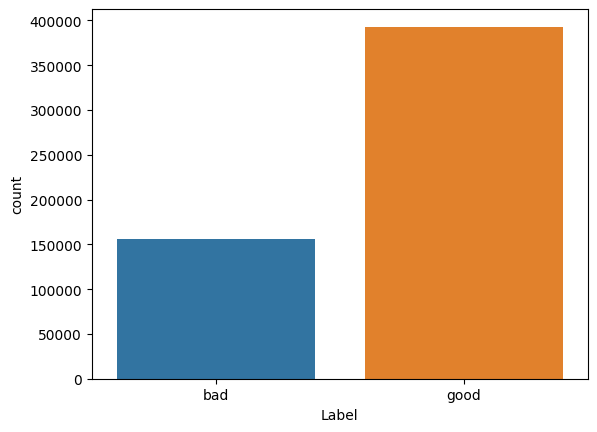

In [31]:
sns.countplot(x="Label",data=df)

In [32]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [33]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [34]:
root_words = SnowballStemmer("english")
df['root_words'] = df['text_tokenized'].map(lambda l: [root_words.stem(word) for word in l])

In [35]:
df['text_sent'] = df['root_words'].map(lambda l: ' '.join(l))

In [36]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [16]:
bad_sites.head()

,URL,Label,text_tokenized,root_words,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [17]:
good_sites.head()


,URL,Label,text_tokenized,root_words,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [37]:
c = CountVectorizer()
cv = c.fit_transform(df.text_sent)

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(cv, df.Label,test_size=0.3, random_state=5)

In [39]:
df.dropna(inplace=True)

df.dropna(axis='columns', inplace=True)

In [40]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(Xtrain, Ytrain)
print(model)

KNeighborsClassifier(n_neighbors=4)


In [41]:
model.score(Xtest, Ytest)


0.8736984539210213

In [45]:
ypred = model.predict(Xtest)

<Axes: >

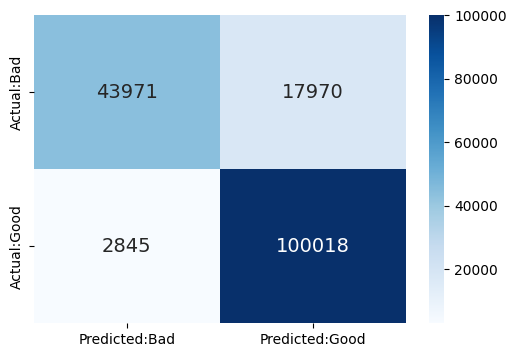

In [46]:
con_mat = pd.DataFrame(confusion_matrix(ypred, Ytest),columns = ['Predicted:Bad', 'Predicted:Good'],index = ['Actual:Bad', 'Actual:Good'])
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})